# Convolutional Neural Networks (CNN)

In [54]:
import cv2
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
mpl.rcParams['figure.dpi'] = 150

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(len(x_test), 28 * 28)
x_test = x_test.astype('float32')/255

## Probleme Fully Connected Neural Networks
![title](images/fully_connected_problems.png)
![title](images/fully_connected_problems2.png)


# Lösung: Convolutional Neural Networks (CNN)
![title](images/cnn2.png)

## Komponenten CNN
![title](images/cnn_components.png)

## Convolutional Layer
- Extrahieren Features
- Reduzierte Berechnung

### Kernel Size
- Anzahl in Berechnung involvierte Pixel (3x3, 5x5, 7x7)

### Anzahl Filter
- Anzahl zu erkennende Features (16, 32, 64, 96)

### Strides
- Distanz zur Verschiebung des Filters
- Grössere Stride -> grössere Pixel unabhängigkeit

![title](images/convolution.png)

![title](images/padding_same.png)

### Keras

In [71]:
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 activation='relu', 
                 padding="SAME", # padding='VALID'
                 strides=1,
                 input_shape=input_shape))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 64)        640       
Total params: 640
Trainable params: 640
Non-trainable params: 0
_________________________________________________________________
None


### Visualisierung

(<matplotlib.axes._subplots.AxesSubplot at 0x29dcea7bf28>,
 ([], <a list of 0 Text yticklabel objects>),
 ([], <a list of 0 Text xticklabel objects>),
 Text(0.5,1,'Filtered'))

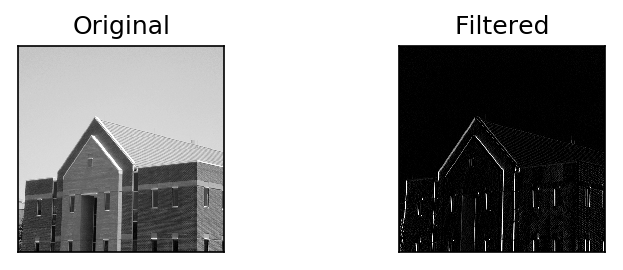

In [34]:
img = cv2.imread("edges.tif")

plt.imshow(img), plt.yticks([]), plt.xticks([]), plt.title("Schacht Original")
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
img_filtered = cv2.filter2D(img, -1, kernel)

plt.subplot(2, 2, 1), plt.imshow(img), plt.yticks([]), plt.xticks([]), plt.title("Original")
plt.subplot(2, 2, 2), plt.imshow(img_filtered), plt.yticks([]), plt.xticks([]), plt.title("Filtered")

(<matplotlib.axes._subplots.AxesSubplot at 0x29dd6013be0>,
 ([], <a list of 0 Text yticklabel objects>),
 ([], <a list of 0 Text xticklabel objects>),
 Text(0.5,1,'Filtered'))

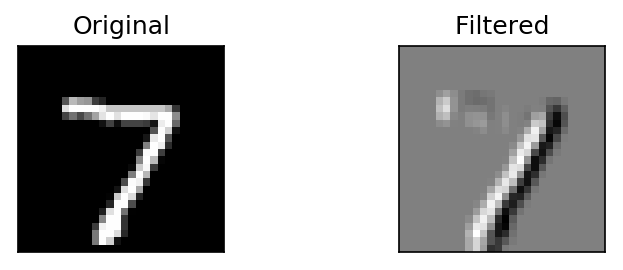

In [52]:
img = x_test[0].reshape([28, 28])

plt.imshow(img), plt.yticks([]), plt.xticks([]), plt.title("Schacht Original")
kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
img_filtered = cv2.filter2D(img, -1, kernel)

plt.subplot(2, 2, 1), plt.imshow(img, cmap="gray"), plt.yticks([]), plt.xticks([]), plt.title("Original")
plt.subplot(2, 2, 2), plt.imshow(img_filtered, cmap="gray"), plt.yticks([]), plt.xticks([]), plt.title("Filtered")

## Pooling Layer (MaxPooling2D)
- Verwerfen von überflüssigen Informationen (z.B. exakte Position einer Kante)
- Translationsinvarianz
- Verringerter Platzbedarf und erhöhte Berechnungsgeschwindigkeit
- Ermöglicht die Erzeugung tieferer Netzwerken
- Prävention von Overfitting

![title](images/max_pooling.png)

In [81]:
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 activation='relu', 
                 padding="SAME",
                 strides=1,
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2),
                      strides=2))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
Total params: 640
Trainable params: 640
Non-trainable params: 0
_________________________________________________________________
None


## Fully Connected Layer (Dense)

In [84]:
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3), 
                 activation='relu', 
                 padding="SAME",
                 strides=1,
                 input_shape=input_shape))
model.add(Flatten())
model.add(Dense(10, activation='relu'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
flatten_3 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                501770    
Total params: 502,410
Trainable params: 502,410
Non-trainable params: 0
_________________________________________________________________
None


## Dropout Layer
- Reduziert Overfitting
![title](images/dropout.png)

In [88]:
model = Sequential()
model.add(Dropout(0.25)) # 1/4 der input units droppen